<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/sampling_generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

In [2]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
# generate sample of 200 values that follow a normal distribution 
# data = normal(loc=0, scale=1, size=200)

data = pd.DataFrame({"zt1" : normal(0, 1, 50000),
                     "zt2" : normal(0, 1, 50000),
                     "zt3" : normal(0, 1, 50000)})
data

,zt1,zt2,zt3
0,-0.515462,1.961846,0.395736
1,1.929555,-0.009726,0.359366
2,1.341648,-1.417684,-0.499735
3,1.904149,-1.251591,-0.688882
4,-0.310883,0.629680,-0.014726
...,...,...,...
49995,1.043675,-0.491913,-0.861130
49996,-0.931089,-0.413823,-0.876499
49997,-0.263113,-0.062605,0.979052
49998,0.222765,1.795417,-0.686255


In [3]:
n=50
rep=1
table_data_all=pd.DataFrame({"rep":[]})
data_copy=data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:]
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy()
        data_copy=pd.DataFrame({"":[]})
    #=========================
    p = 0

    Zt1 = data_new['zt1']
    Zt2 = data_new['zt2']
    Zt3 = data_new['zt3']

    xt1 = (1-(p**2))**(1/2)*Zt1
    xt2 = (1-(p**2))**(1/2)*Zt2
    xt3 = (1-(p**2))**(1/2)*Zt3

    new_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                             'Xt2' : data_new['zt2'],
                             'Xt3' : data_new['zt3'],
                             'e'   : normal(0, xt2**4, n)})


    table_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                               'Xt2' : data_new['zt2'],
                               'Xt3' : data_new['zt3'],
                               'e'   : new_data['e']})
  

    table_data['Y'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']+table_data['e']
    #table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    # display(table_data)
    rep+=1
    if rep==100:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

Xt1       Xt2       Xt3          e          Y
rep  index                                                    
1.0  0.0   -0.166570  2.187389 -0.235378 -37.499579 -31.132483
     1.0   -0.610359  0.816979 -0.261239  -0.132469   3.908394
     2.0    2.019648  0.099371 -0.377634   0.000037   3.597471
     3.0    0.018843  0.562306 -0.046034   0.098815   4.784088
     4.0    0.243067 -0.291029 -0.463773   0.006523   1.997624
...              ...       ...       ...        ...        ...
99.0 45.0  -2.030709 -0.251461 -1.558500   0.000499  -2.799578
     46.0   0.421567  0.193854  1.231342   0.002119   8.894360
     47.0   0.427431  0.453588 -0.439712   0.023774   3.292166
     48.0   2.097895 -0.483763  1.338211   0.017246   8.948319
     49.0   1.285904 -0.614629  1.702361   0.149400   9.870317

[4950 rows x 5 columns]

In [5]:
x = table_data_all[['Xt1', 'Xt2', 'Xt3',]]
y = table_data_all['Y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

In [6]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

Actual  Predicted
rep  index                      
1.0  0.0   -31.132483   6.486616
     1.0     3.908394   4.076313
     2.0     3.597471   3.598836
     3.0     4.784088   4.712345
     4.0     1.997624   1.960124
...               ...        ...
99.0 45.0   -2.799578  -2.859446
     46.0    8.894360   8.923815
     47.0    3.292166   3.283051
     48.0    8.948319   8.931327
     49.0    9.870317   9.717039

[4950 rows x 2 columns]

In [7]:
table_data_new = pd.DataFrame({'Xt1'   : table_data_all['Xt1'],
                               'Xt2'   : table_data_all['Xt2'],
                               'Xt3'   : table_data_all['Xt3'],
                               'e'     : table_data_all['e'],
                               'Y'     : df['Actual'],
                               'y_hat' : df['Predicted']})
table_data_new['e_hat'] = table_data_new['Y']-table_data_new['y_hat']
table_data_new

Xt1       Xt2       Xt3  ...          Y     y_hat      e_hat
rep  index                                ...                                
1.0  0.0   -0.166570  2.187389 -0.235378  ... -31.132483  6.486616 -37.619099
     1.0   -0.610359  0.816979 -0.261239  ...   3.908394  4.076313  -0.167919
     2.0    2.019648  0.099371 -0.377634  ...   3.597471  3.598836  -0.001365
     3.0    0.018843  0.562306 -0.046034  ...   4.784088  4.712345   0.071743
     4.0    0.243067 -0.291029 -0.463773  ...   1.997624  1.960124   0.037500
...              ...       ...       ...  ...        ...       ...        ...
99.0 45.0  -2.030709 -0.251461 -1.558500  ...  -2.799578 -2.859446   0.059868
     46.0   0.421567  0.193854  1.231342  ...   8.894360  8.923815  -0.029455
     47.0   0.427431  0.453588 -0.439712  ...   3.292166  3.283051   0.009114
     48.0   2.097895 -0.483763  1.338211  ...   8.948319  8.931327   0.016991
     49.0   1.285904 -0.614629  1.702361  ...   9.870317  9.717039   0.153279

[4950 rows x 7 columns]

In [15]:
table_data_new.to_csv('sampling_generate_data.csv')
files.download('sampling_generate_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
table_data_new.mean()

Xt1      3.496289e-03
Xt2      2.496910e-03
Xt3     -1.568202e-02
e       -5.782236e-03
Y        3.942906e+00
y_hat    3.942906e+00
e_hat   -3.270291e-15
dtype: float64

In [9]:
table_data_new.var()

Xt1        0.989597
Xt2        1.033668
Xt3        1.007021
e         90.572002
Y        106.718344
y_hat     16.150471
e_hat     90.567874
dtype: float64

In [10]:
# Compute pairwise correlation of columns, excluding NA/null values.
table_data_new.corr()

,Xt1,Xt2,Xt3,e,Y,y_hat,e_hat
Xt1,1.000000e+00,2.620969e-02,1.657887e-02,0.000638,0.048773,1.253742e-01,4.978074e-17
Xt2,2.620969e-02,1.000000e+00,1.741270e-02,0.006417,0.160636,4.129244e-01,-7.939445e-17
Xt3,1.657887e-02,1.741270e-02,1.000000e+00,0.002164,0.354908,9.123114e-01,-4.387496e-17
e,6.379932e-04,6.416959e-03,2.164265e-03,1.000000,0.922979,4.551762e-03,9.999772e-01
Y,4.877321e-02,1.606363e-01,3.549083e-01,0.922979,1.000000,3.890210e-01,9.212289e-01
y_hat,1.253742e-01,4.129244e-01,9.123114e-01,0.004552,0.389021,1.000000e+00,-5.781731e-17
e_hat,4.978074e-17,-7.939445e-17,-4.387496e-17,0.999977,0.921229,-5.781731e-17,1.000000e+00


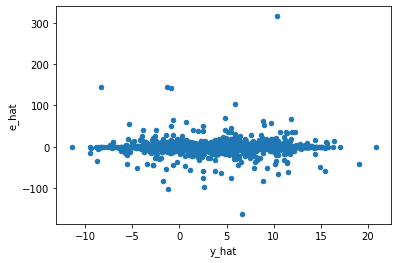

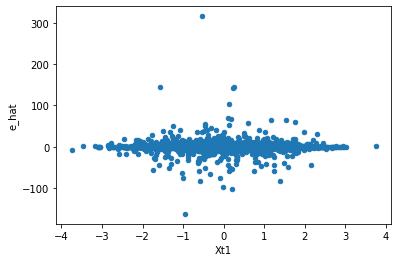

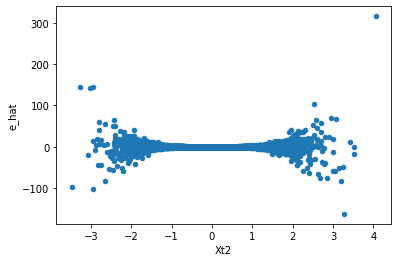

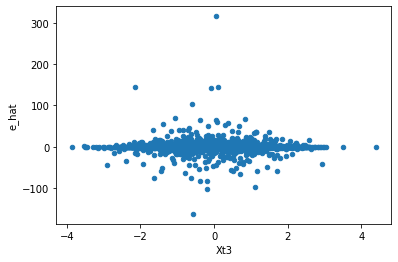

In [11]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt3', y='e_hat', kind = 'scatter')